# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [108]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

%matplotlib inline

In [109]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [110]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [111]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [112]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [113]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19137806,
            "id": 1,
            "last_updated": 1661972997,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 383066795800,
                    "percent_change_1h": 0.240284538318494,
                    "percent_change_24h": 1.05069584182864,
                    "percent_change_7d": -7.03202214078576,
                    "percentage_change_1h": 0.240284538318494,
                    "percentage_change_24h": 1.05069584182864,
                    "percentage_change_7d": -7.03202214078576,
                    "price": 20046.0,
                    "volume_24h": 29424475563
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19137806,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [114]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120329523,
            "id": 1027,
            "last_updated": 1661972997,
            "max_supply": 120328672,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 186362138239,
                    "percent_change_1h": 0.398146743134391,
                    "percent_change_24h": 1.88409698817325,
                    "percent_change_7d": -6.65364907316701,
                    "percentage_change_1h": 0.398146743134391,
                    "percentage_change_24h": 1.88409698817325,
                    "percentage_change_7d": -6.65364907316701,
                    "price": 1554.96,
                    "volume_24h": 19862284885
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120329523,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryp

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [115]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE
print(f"The current price for Bitcoin is ${btc_price}")

The current price for Bitcoin is $20046.0


In [116]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current price for Ethereum is ${eth_price}")


The current price for Ethereum is $1554.96


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [117]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f"The current value for Bitcoin is ${btc_value:.2f}")

The current value for Bitcoin is $24055.20


In [118]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
print(f"The current value for Ethereum is ${eth_value:.2f}")

The current value for Ethereum is $8241.29


In [119]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The current cryptocurrency wallet balance is ${total_crypto_wallet:.2f}")

The current cryptocurrency wallet balance is $32296.49


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [120]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [121]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [122]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = "SPY", "AGG"

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [123]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
current_closing_price_df =  alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = current_closing_price_df[current_closing_price_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = current_closing_price_df[current_closing_price_df['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
current_closing_price_df= pd.concat([SPY, AGG], keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
current_closing_price_df.head()


,,open,high,low,close,volume,trade_count,vwap
,timestamp,,,,,,,
SPY,2020-08-07 04:00:00+00:00,333.29,334.88,332.300,334.57,57282821,350100,333.800372
AGG,2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [124]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(current_closing_price_df.loc["AGG"]["close"])

# Print the AGG closing price
print(f"The closing price for AGG is {agg_close_price}")


The closing price for AGG is 119.43


In [125]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price =float(current_closing_price_df.loc["SPY"]["close"])
# Print the SPY closing price
print(f"The closing price for SPY is {spy_close_price}")



The closing price for SPY is 334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [126]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE
print(f"The current value of EGG porfolio is ${agg_value:.2f}")

The current value of EGG porfolio is $23886.00


In [127]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE
print(f"The current value of spy porfolio is ${spy_value:.2f}")

The current value of spy porfolio is $36802.70


In [128]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of stock and bond portion of the portfolio is {total_stocks_bonds:.2f}")


The current balance of stock and bond portion of the portfolio is 60688.70


In [129]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"current cryptocurrency wallet balance is {total_portfolio:.2f}")


current cryptocurrency wallet balance is 92985.19


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [130]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
# YOUR CODE HERE
savings_data    

[32296.488, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [131]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data = savings_data, columns = ["amount"], index = ["crypto","stock/bond"])

# Display the savings_df DataFrame
savings_df


,amount
crypto,32296.488
stock/bond,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"The composition of the member's portfolio"}, ylabel='amount'>

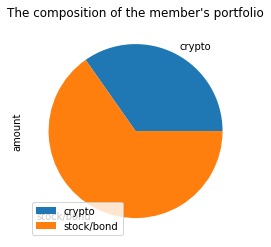

In [132]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot(kind ="pie", y="amount", title= "The composition of the member's portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [133]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [134]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations you have enough money in the fund!")
elif total_portfolio == emergency_fund_value:
    print("Congratulation you on reaching important financial goal!")
else:
    print("You are ${ emergency_fund_value - total_portfolio} away from reaching the goal")


Congratulations you have enough money in the fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
mc_start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
mc_end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [92]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
mc_prices_df =  alpaca.get_bars(
    tickers,
    timeframe,
    start=mc_start_date,
    end=mc_end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = mc_prices_df[mc_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = mc_prices_df[mc_prices_df['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
mc_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])


# Display both the first and last five rows of the DataFrame
display(mc_prices_df.head())
display(mc_prices_df.tail())

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066   
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.87  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.85  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.94  109.6800   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-07 04:00:00+00:00  109.67  2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.57  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.67  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.78  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.87  1913253       10113  109.860974

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79  53078112   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06  41917896   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11  42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33  43679448   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288003  328.658795  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250899  329.057592  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290036  332.939600  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935154       39113  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [93]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_spy60_weight =  MCSimulation(
    portfolio_data = mc_prices_df,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)


# Review the simulation input data
# YOUR CODE HERE
MC_spy60_weight.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    -0.000040  109.87   
2017-08-10 04:00:00+00:00      424321  245.027847    -0.014115  109.70   
2017-08-11 04:00:00+00:00      278786  244.222867     0.001477  109.75   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67  2359826        7755   
2017-08-08 04:00:00+00:00  109.69  109.5000  109.57  2570876       12663   
2017-08-09 04:00:00+00:00  109.87  109.6600  109.67  2308932       11031   
2017-08-10 04:00:00+00:00  109.85  109.6700  109.78  2004163       12437   
2017-08-11 04:00:00+00:00  109.94  109.6800  109.87  1913253       10113   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  109.674876          NaN  
2017-08-08 04:00:00+00:00  109.577636    -0.000912  
2017-08-09 04:00:00+00:00  109.771749     0.000913  
2017-08-10 04:00:00+00:00  109.776611     0.001003  
2017-08-11 04:00:00+00:00  109.860974     0.000820

In [94]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_spy60_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000155,1.013491,0.996422,1.000099,0.999818,0.995961,1.003211,1.000812,1.000252,0.999630,...,0.999587,0.995315,0.975262,0.995097,1.001581,0.998144,1.002042,0.999335,0.990661,0.993441
2,1.007539,1.016587,1.004221,1.001005,0.986927,0.987164,0.994770,1.004473,0.996778,1.003407,...,1.002110,0.997659,0.975432,0.996607,1.000318,0.983506,1.019810,1.017932,0.985181,0.994823
3,1.018747,1.007284,1.029401,1.001673,0.995148,0.987020,0.997255,1.011095,1.021018,1.009530,...,1.006278,1.012002,0.996983,0.998143,1.006735,0.979598,1.024593,1.022908,0.990355,1.004592
4,1.025846,1.008536,1.026975,1.006286,1.008069,0.987250,0.990005,0.999540,1.021845,1.018966,...,0.996348,1.015957,1.004183,1.005845,1.001732,0.985514,1.037563,1.005509,0.983599,1.004803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.047173,23.509718,13.462572,7.564661,2.914833,11.178289,9.637017,4.453810,12.561642,13.027914,...,29.111081,6.822456,10.061278,6.136875,5.258694,7.765638,11.774882,6.133576,9.205947,48.828195
7557,30.751050,23.391247,13.519537,7.579573,2.900251,11.300623,9.806941,4.497546,12.422213,12.995750,...,29.669865,6.814766,9.858023,6.020229,5.246537,7.759594,11.696104,6.206166,9.202895,48.840758
7558,30.451579,23.183115,13.544758,7.575105,2.954388,11.377650,9.879343,4.576049,12.393037,12.984855,...,29.646230,6.837888,9.879176,6.053734,5.184450,7.782956,11.964804,6.115866,9.250760,49.243501
7559,29.959267,22.915924,13.321588,7.685281,2.976184,11.441097,9.750743,4.488086,12.332215,12.901962,...,29.872868,6.892796,10.000648,6.046757,5.228826,7.723851,11.961013,6.059225,9.257891,48.821637


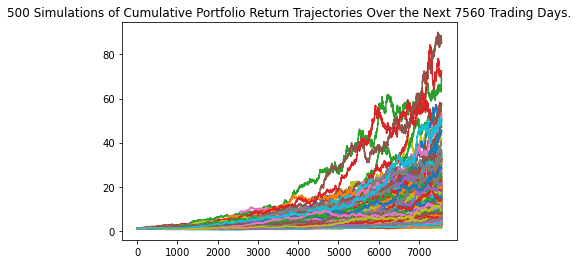

In [96]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
spy60_weight_line_plot= MC_spy60_weight.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

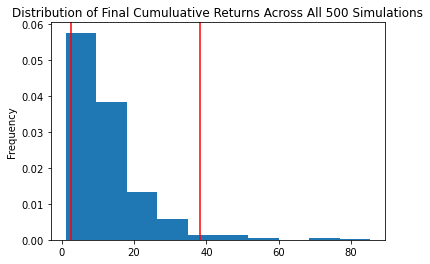

In [97]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
spy60_weight_distribution_plot = MC_spy60_weight.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [98]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
spy60_weight_table = MC_spy60_weight.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(spy60_weight_table)

count           500.000000
mean             12.710637
std              10.271194
min               1.114381
25%               6.235595
50%               9.659224
75%              16.333102
max              85.236292
95% CI Lower      2.521345
95% CI Upper     38.147464
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [99]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

60688.7


In [100]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(spy60_weight_table[8]* total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(spy60_weight_table[9]* total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
      f" with an spy weight portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of $60688.7 in the portfolio with an spy weight portfolio over the next 30 years will end within in the range of $153017.14 and $2315120.0.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [101]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

MC_spy80_weight =  MCSimulation(
    portfolio_data = mc_prices_df,
    weights = [.80, .20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Review the simulation input data
# YOUR CODE HERE
MC_spy80_weight.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00      100111  247.668698          NaN  109.69   
2017-08-08 04:00:00+00:00      192921  247.739709    -0.002461  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    -0.000040  109.87   
2017-08-10 04:00:00+00:00      424321  245.027847    -0.014115  109.70   
2017-08-11 04:00:00+00:00      278786  244.222867     0.001477  109.75   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67  2359826        7755   
2017-08-08 04:00:00+00:00  109.69  109.5000  109.57  2570876       12663   
2017-08-09 04:00:00+00:00  109.87  109.6600  109.67  2308932       11031   
2017-08-10 04:00:00+00:00  109.85  109.6700  109.78  2004163       12437   
2017-08-11 04:00:00+00:00  109.94  109.6800  109.87  1913253       10113   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  109.674876          NaN  
2017-08-08 04:00:00+00:00  109.577636    -0.000912  
2017-08-09 04:00:00+00:00  109.771749     0.000913  
2017-08-10 04:00:00+00:00  109.776611     0.001003  
2017-08-11 04:00:00+00:00  109.860974     0.000820

In [102]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_spy80_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006126,0.993636,1.004445,1.006271,1.003951,0.978827,0.999861,0.989174,1.007041,0.999474,...,0.992669,1.001603,0.998245,0.999022,1.008524,1.002015,0.996361,0.997918,1.004321,0.995209
2,0.999288,0.996897,1.003740,0.984704,0.983736,0.966479,0.988829,0.997087,1.006186,1.003091,...,0.994576,0.993674,1.003332,0.986944,1.011245,0.997092,1.009213,1.012705,1.000496,0.998233
3,1.008186,0.978436,1.023883,0.992674,0.984514,0.954874,0.992323,1.004134,0.998693,1.024144,...,0.990924,0.995826,1.008139,0.995816,1.021687,1.008607,1.010047,1.031795,1.004391,1.011836
4,1.009761,0.988787,1.030122,1.005233,0.982985,0.962132,1.005408,1.012565,1.012802,1.039580,...,0.989145,1.006386,1.010106,1.004939,1.002573,1.021519,0.987247,1.024467,1.013815,1.009435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.864386,1.529758,3.005162,2.607870,1.965963,1.381817,1.199475,6.079875,1.835691,1.628779,...,4.168056,1.759617,2.078120,3.502097,1.061144,3.892025,0.969328,1.268996,8.654311,3.360319
2517,0.861127,1.534578,2.992225,2.590497,1.970616,1.380718,1.233520,6.095661,1.822261,1.614303,...,4.180664,1.743483,2.121262,3.490022,1.056476,3.819643,0.986974,1.293350,8.746314,3.335935
2518,0.855991,1.518166,2.971049,2.565970,1.952694,1.355951,1.228690,5.985872,1.783940,1.625872,...,4.161574,1.732180,2.115769,3.565118,1.046162,3.811400,0.961216,1.277391,8.720861,3.372679
2519,0.855190,1.525646,3.028346,2.558121,1.913697,1.362858,1.217518,6.009190,1.778678,1.647791,...,4.119418,1.731059,2.113156,3.581311,1.049813,3.824165,0.953480,1.282729,8.726700,3.377223


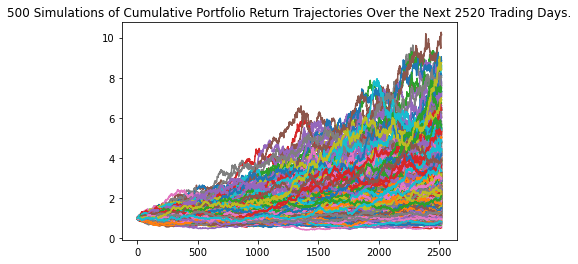

In [103]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_spy80_weight_line_plot = MC_spy80_weight.plot_simulation()



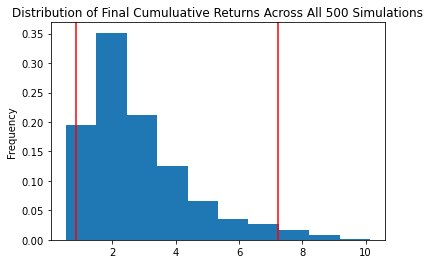

In [104]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_spy80_weight_dist_plot= MC_spy80_weight.plot_distribution()


In [105]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
spy80_weight_table = MC_spy80_weight.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
spy80_weight_table

count           500.000000
mean              2.823500
std               1.635190
min               0.529508
25%               1.656028
50%               2.376004
75%               3.643119
max              10.144750
95% CI Lower      0.844928
95% CI Upper      7.232659
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [106]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

60688.7


In [107]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(spy80_weight_table[8]* total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(spy80_weight_table[9]* total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
      f" with an spy weight portfolio over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")



There is a 95% chance that an initial investment of $60688.7 in the portfolio with an spy weight portfolio over the next 10 years will end within in the range of $51277.58 and $438940.67.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?